In [28]:
import numpy as np
import sys
sys.path.append("/home/zoker/quict/")

from QuICT.core import Circuit
from QuICT.core.gate import *
from QuICT.simulation.state_vector import ConstantStateVectorSimulator

In [3]:
def incr(n_qubits):
    circuit = Circuit(n_qubits)
    MCX = MultiControlToffoli()
    for i in range(n_qubits):
        print(n_qubits - i - 1, list(range(n_qubits - 1, i - 1, -1)))
        MCX(n_qubits - i - 1) | circuit(list(range(n_qubits - 1, i - 1, -1)))
    return circuit

def decr(n_qubits):
    circuit = Circuit(n_qubits)
    MCX = MultiControlToffoli()
    for i in range(n_qubits):
        ctrls = list(range(i + 1, n_qubits))
        for qid in ctrls:
            X | circuit(qid)
        MCX(n_qubits - i - 1) | circuit(list(range(n_qubits - 1, i - 1, -1)))
        for qid in ctrls:
            X | circuit(qid)
    return circuit

def construct_circuit(length):
    pos_qubits = int(np.ceil(np.log2(length)))
    n_qubits = pos_qubits + 1
    return

2023-01-09 21:56:15 | circuit | INFO | Initial Quantum Circuit circuit_625607fa902511ed9ce3fd0ce661b241 with 3 qubits.
2023-01-09 21:56:15 | circuit | INFO | Initial Quantum Circuit circuit_625623f2902511ed9ce3fd0ce661b241 with 3 qubits.
2023-01-09 21:56:15 | circuit | INFO | Initial Quantum Circuit circuit_6256393c902511ed9ce3fd0ce661b241 with 3 qubits.


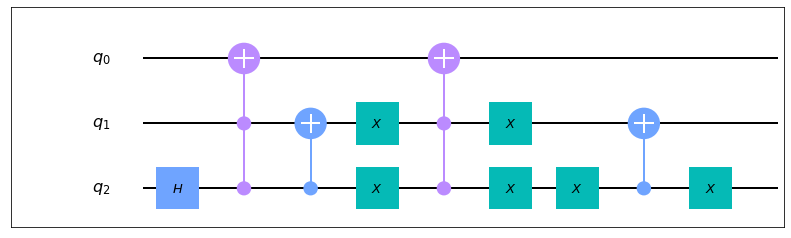

In [17]:
def control_incr(n_qubits):
    circuit = Circuit(n_qubits)
    MCX = MultiControlToffoli()
    for i in range(n_qubits - 1):
        MCX(n_qubits - i - 1) | circuit(list(range(n_qubits - 1, i - 1, -1)))
    return circuit

def neg_control_decr(n_qubits):
    circuit = Circuit(n_qubits)
    MCX = MultiControlToffoli()
    for i in range(n_qubits - 1):
        ctrls = list(range(i + 1, n_qubits))
        for qid in ctrls:
            X | circuit(qid)
        MCX(n_qubits - i - 1) | circuit(list(range(n_qubits - 1, i - 1, -1)))
        for qid in ctrls:
            X | circuit(qid)
    return circuit

def construct_circuit(n_qubits):
    circuit = Circuit(n_qubits)
    subnode = n_qubits - 1
    H | circuit(subnode)
    incr = control_incr(n_qubits)
    decr = neg_control_decr(n_qubits)
    circuit.extend(incr.gates)
    circuit.extend(decr.gates)
    return circuit

In [29]:
nodes = 4
# nodes必须是2的整数次幂
assert abs(np.log2(nodes) - np.floor(np.log2(nodes))) < 1e-9, "nodes must be an integer power of 2"
circuit = construct_circuit(nodes + 1)
simulator = ConstantStateVectorSimulator()
sv = simulator.run(circuit)
print(sv)


2023-01-09 22:04:57 | circuit | INFO | Initial Quantum Circuit circuit_99228988902611ed9ce3fd0ce661b241 with 5 qubits.
2023-01-09 22:04:57 | circuit | INFO | Initial Quantum Circuit circuit_9922a56c902611ed9ce3fd0ce661b241 with 5 qubits.
2023-01-09 22:04:57 | circuit | INFO | Initial Quantum Circuit circuit_9923ac64902611ed9ce3fd0ce661b241 with 5 qubits.
[-3.29365923e-17+6.71425820e-18j  4.67633933e-18-6.21762143e-18j
 -4.31623176e-17+1.87598774e-17j  7.07106781e-01-8.44383056e-17j
 -1.29276346e-17+1.34621497e-17j -4.67633933e-18-6.21762143e-18j
 -3.73498693e-17+3.75184358e-17j  0.00000000e+00+0.00000000e+00j
  5.10491067e-19+1.54945046e-17j -1.26425385e-17+1.26283235e-17j
  1.97808595e-17+2.25151797e-17j  0.00000000e+00+7.05599253e-17j
  1.27720338e-17+1.16207971e-17j  1.26425385e-17+1.26283235e-17j
  5.55111512e-17+4.52697534e-17j  2.02130269e-19+0.00000000e+00j
 -1.25699035e-17+1.28793111e-17j  5.68188518e-18+3.07627764e-18j
  3.08148791e-33+1.01137284e-18j  5.55111512e-17+5.4340757